# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [1]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [2]:
# 3 digits waves 4,5,6 merge on year and country
merge_share_ewcs("3digits_w456_year_country.csv", convert_to_3_digits=True)
# 3 digits waves 4,5,6 common merge on year and country
merge_share_ewcs(
    "3digits_w456_year_country_balanced.csv", convert_to_3_digits=True, balanced=True
)
# 3 digits waves 4,6 merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country.csv", convert_to_3_digits=True, exclude_wave_5=True
)
# 3 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
)

# 3 digits waves 4,5,6 merge on year
merge_share_ewcs(
    "3digits_w456_year.csv", convert_to_3_digits=True, not_country_wise=True
)
# 3 digits waves 4,5,6 common merge on year
merge_share_ewcs(
    "3digits_w456_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 merge on year
merge_share_ewcs(
    "3digits_w46_year.csv",
    convert_to_3_digits=True,
    exclude_wave_5=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 common merge on year
merge_share_ewcs(
    "3digits_w46_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

# 4 digits waves 4,5,6 merge on year and country
merge_share_ewcs("4digits_w456_year_country.csv")
# 4 digits waves 4,5,6 common merge on year and country
merge_share_ewcs("4digits_w456_year_country_balanced.csv", balanced=True)
# 4 digits waves 4,6 merge on year and country
merge_share_ewcs("4digits_w46_year_country.csv", exclude_wave_5=True)
# 4 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "4digits_w46_year_country_balanced.csv", balanced=True, exclude_wave_5=True
)

# 4 digits waves 4,5,6 merge on year
merge_share_ewcs("4digits_w456_year.csv", not_country_wise=True)
# 4 digits waves 4,5,6 common merge on year
merge_share_ewcs("4digits_w456_year_balanced.csv", balanced=True, not_country_wise=True)
# 4 digits waves 4,6 merge on year
merge_share_ewcs("4digits_w46_year.csv", exclude_wave_5=True, not_country_wise=True)
# 4 digits waves 4,6 common merge on year
merge_share_ewcs(
    "4digits_w46_year_balanced.csv",
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

In [3]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_w456_year_country_balanced : 1375 unique ids
4digits_w456_year_country_balanced : 1193 unique ids
4digits_w46_year_country : 2073 unique ids
4digits_w456_year_country : 2127 unique ids
3digits_w46_year_country : 2477 unique ids
3digits_w456_year_balanced : 1438 unique ids
4digits_w46_year_country_balanced : 1286 unique ids
4digits_w46_year_balanced : 1535 unique ids
4digits_w46_year : 2669 unique ids
4digits_w456_year : 2761 unique ids
3digits_w46_year_country_balanced : 1474 unique ids
3digits_w456_year_country : 2558 unique ids
3digits_w456_year : 2817 unique ids
3digits_w46_year_balanced : 1548 unique ids
4digits_w456_year_balanced : 1425 unique ids
3digits_w46_year : 2714 unique ids


In [4]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_balanced.csv"
)

Number of unique IDs: 1535
Number of unique IDs by country:
country
Austria           143
Belgium           262
Czech Republic    143
Denmark           162
Estonia           300
France            171
Germany            28
Italy             119
Slovenia           87
Spain             120
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    1520
2015    1486
Name: mergeid, dtype: int64

Demographics:
            age    gender  nb_children  yrseducation
count  15030.00  15030.00     15030.00      15030.00
mean      55.74      0.57         1.84         13.14
std        3.09      0.49         1.29          4.06
min       50.00      0.00         0.00          0.00
25%       53.00      0.00         1.00         11.00
50%       56.00      1.00         2.00         13.00
75%       58.00      1.00         2.00         16.00
max       65.00      1.00        10.00         36.00


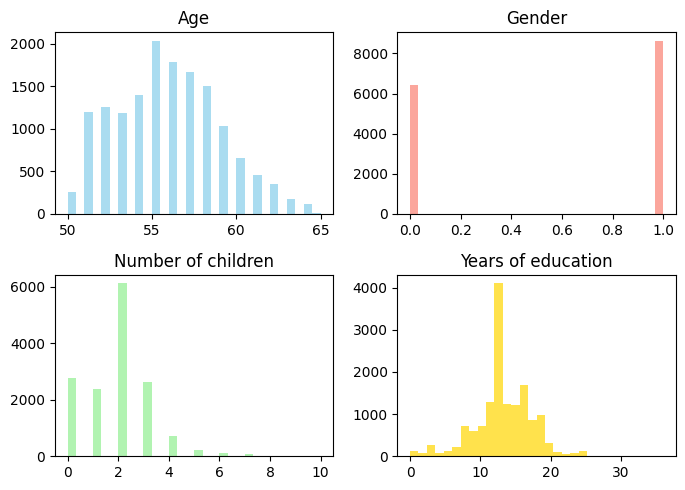


Job Status:
job_status
Employee                   0.35
Private sector employee    0.25
Public sector employee     0.18
Self-employed              0.12
Civil servant              0.09
Name: proportion, dtype: float64

Industry of Employment:
industry
Education                                       0.14
Health and social work                          0.14
Other community                                 0.13
Public administration and defence               0.12
Manufacturing                                   0.11
Wholesale and retail trade                      0.11
Transport, storage and communication            0.06
Construction                                    0.05
Agriculture, hunting, forestry, fishing         0.05
Financial intermediation                        0.03
Hotels and restaurants                          0.02
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Mining and quarrying                            0.01
Name: p

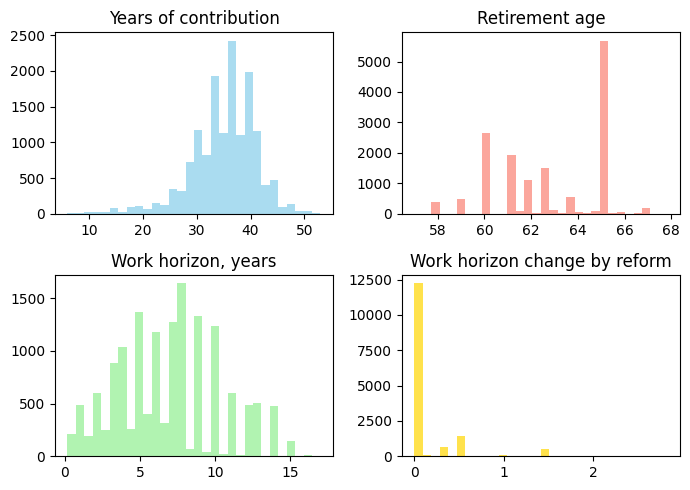


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.41
1       0           0.34
0       1           0.20
1       1           0.06
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.82
1    0.18
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     3950
1.0     3730
2.0     2830
3.0     1815
4.0     1305
5.0      715
6.0      385
7.0      175
8.0       55
9.0       50
10.0      15
12.0       5
Name: count, dtype: int64


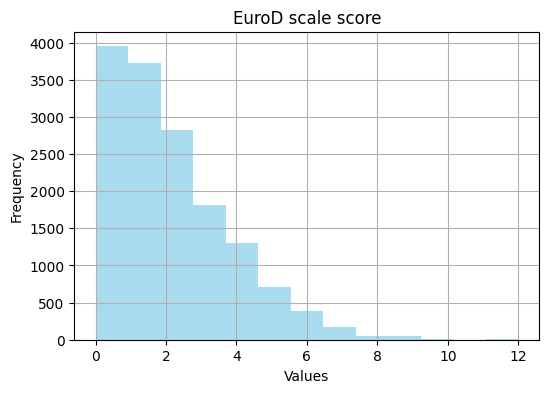


Working Conditions:
       jqi_monthly_earnings  jqi_skills_discretion  jqi_social_environment  \
count              15030.00               15030.00                15030.00   
mean                1574.10                  59.69                   80.57   
std                  506.27                  14.02                    5.12   
min                  307.61                  18.73                   50.00   
25%                 1248.06                  48.93                   78.26   
50%                 1506.60                  59.86                   81.17   
75%                 1817.04                  71.41                   83.29   
max                 4320.87                  90.73                  100.00   

       jqi_physical_environment  jqi_intensity  jqi_prospects  \
count                  15030.00       15030.00       15030.00   
mean                      84.63          51.79          59.67   
std                        8.70           7.74           9.96   
min             

In [5]:
describe_data(df)